<h1 align="center">Volume 4: Total Variation.</h1>

    NAME Daniel Smith
    Section # 2
    DATE 10 February 2022

In [71]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.random import random_integers, uniform, randn
import matplotlib.pyplot as plt
from matplotlib import cm
from imageio import imread, imwrite

# Problem 1

Using 20 x steps, 250 time steps, and a final time of .2, plot the solution that
minimizes (17.4). It should match figure 17.1.

Difference in iterations is  0.0
Final time =  0.2
20


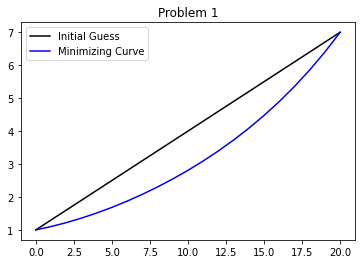

In [72]:
# Update variables and parameters for problem 1
a, b = -1, 1.
alpha, beta = 1., 7.
final_T = 0.2
time_steps, x_steps = 250, 20
delta_t, delta_x = final_T/time_steps, (b - a)/x_steps
x0 = np.linspace(a, b, x_steps + 1)

if delta_t/delta_x**2. > .5:
    print("stability condition fails")
    
u = np.empty((2, x_steps + 1))
u[0] = (beta - alpha)/(b - a)*(x0 - a) + alpha
u[1] = (beta - alpha)/(b - a)*(x0 - a) + alpha

plt.plot(u[0], color = "black", label = "Initial Guess") # Plot initial guess 

def rhs(y):
    yp = (np.roll(y, -1) - np.roll(y, 1))/(2.*delta_x)
    ypp = (np.roll(y, -1) - 2.*y + np.roll(y, 1))/delta_x**2.
    y[1:-1] -= delta_t*(1. + yp[1:-1]**2. - 1.*y[1:-1]*ypp[1:-1])
    
iteration = 0
while iteration < time_steps:
    rhs(u[1])
    if np.linalg.norm(np.abs((u[0] - u[1]))) < 1e-5: break
    u[0] = u[1]
    iteration += 1
    
print("Difference in iterations is ", np.linalg.norm(np.abs((u[0] - u[1]))))
print("Final time = ", iteration*delta_t)

xdom = np.linspace(-1, 1, x_steps)
print(len(xdom))
plt.plot(u[0], color = "blue", label = "Minimizing Curve") # Plot minimizing curve 
plt.legend()
plt.title("Problem 1")
plt.show()

# Problem 2

Using 4t = 1e−3, λ = 40, 4x = 1, and 4y = 1, implement the numerical scheme
mentioned above to obtain a solution u. (So Ω = [0, nx] × [0, ny], where nx and ny represent
the number of pixels in the x and y dimensions, respectively.) Take 250 steps in time. Compare
your results with Figure 17.3.

/var/folders/qm/m3jsv_l56dxchbnmx74t_m1m0000gn/T/ipykernel_44260/442232303.py:11: DeprecationWarning: This function is deprecated. Please call randint(1, 798 + 1) instead
  x_, y_ = random_integers(1, IM_x - 2), random_integers(1, IM_y - 2)
/var/folders/qm/m3jsv_l56dxchbnmx74t_m1m0000gn/T/ipykernel_44260/442232303.py:11: DeprecationWarning: This function is deprecated. Please call randint(1, 598 + 1) instead
  x_, y_ = random_integers(1, IM_x - 2), random_integers(1, IM_y - 2)


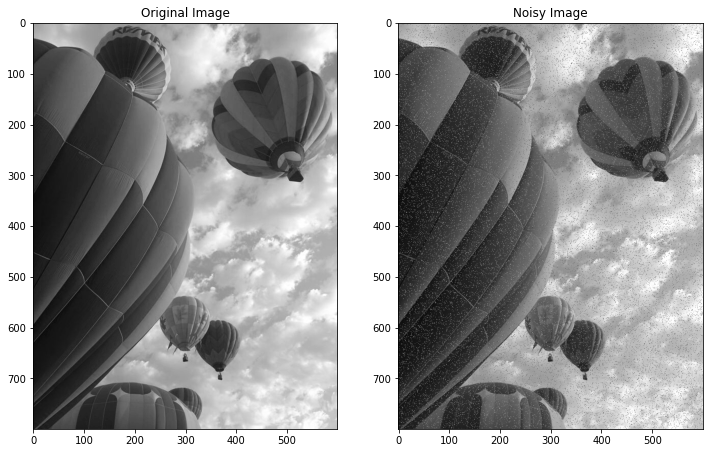

Difference in iterations is  0.0
Final time =  0.25


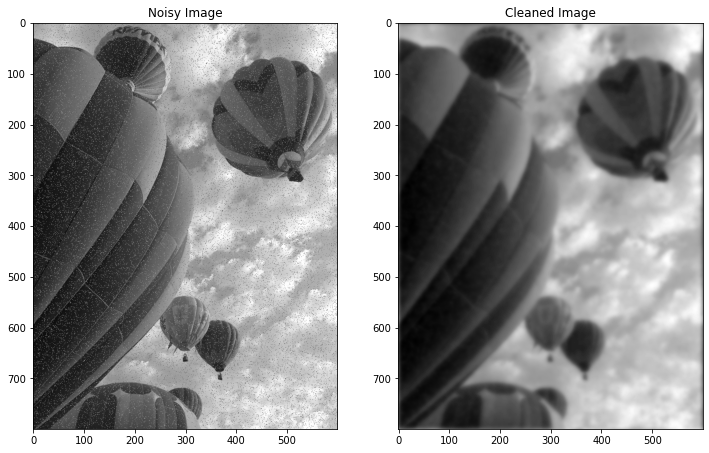

In [73]:
imagename = 'balloons_grey.jpg'
changed_pixels=40000
# Read the image file imagename into an array of numbers, IM
# Multiply by 1. / 255 to change the values so that they are floating point
# numbers ranging from 0 to 1.
IM = imread(imagename, as_gray = True) * (1. / 255)
IM_x, IM_y = IM.shape
IM_og = np.copy(IM)

for lost in range(changed_pixels):
    x_, y_ = random_integers(1, IM_x - 2), random_integers(1, IM_y - 2)
    val = .1*randn() + .5
    IM[x_, y_] = max(min(val, 1.), 0.)

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 12))
ax1.imshow(IM_og, cmap = "gray")
ax2.imshow(IM, cmap = "gray")
ax1.set_title("Original Image")
ax2.set_title("Noisy Image")
plt.show()

# Update variables and parameters for problem 2
lam = 40
time_steps = 250
delta_t, delta_x, delta_y = 1e-3, 1, 1

if delta_t/delta_x**2. > .5:
    print("stability condition fails")

IM0 = np.copy(IM)
IM1 = np.copy(IM)
    
def rhs(u):
    u_xx = np.roll(u, -1, axis = 1) - 2*u + np.roll(u, 1, axis = 1)/delta_x**2
    u_yy = np.roll(u, -1, axis = 0) - 2*u + np.roll(u, 1, axis = 0)/delta_y**2
    u = -(u - IM - lam*(u_xx + u_yy))*delta_t + u
    return u

iteration = 0
while iteration < time_steps:
    IM1 = rhs(IM1)
    if np.linalg.norm(np.abs((IM0 - IM1))) < 1e-5: break
    IM0 = IM1
    iteration += 1
    
print("Difference in iterations is ", np.linalg.norm(np.abs((IM0 - IM1))))
print("Final time = ", iteration*delta_t)

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 12))
ax1.imshow(IM, cmap = "gray")
ax2.imshow(IM0, cmap = "gray")
ax1.set_title("Noisy Image")
ax2.set_title("Cleaned Image")
plt.show()

# Problem 3

Using 4t = 1e − 3, λ = 1, 4x = 1, and 4y = 1, implement the numerical scheme
mentioned above to obtain a solution u. Take 200 steps in time. Compare your results with
Figure 17.3. How small should ε be?

/var/folders/qm/m3jsv_l56dxchbnmx74t_m1m0000gn/T/ipykernel_44260/987189635.py:11: DeprecationWarning: This function is deprecated. Please call randint(1, 798 + 1) instead
  x_, y_ = random_integers(1, IM_x - 2), random_integers(1, IM_y - 2)
/var/folders/qm/m3jsv_l56dxchbnmx74t_m1m0000gn/T/ipykernel_44260/987189635.py:11: DeprecationWarning: This function is deprecated. Please call randint(1, 598 + 1) instead
  x_, y_ = random_integers(1, IM_x - 2), random_integers(1, IM_y - 2)


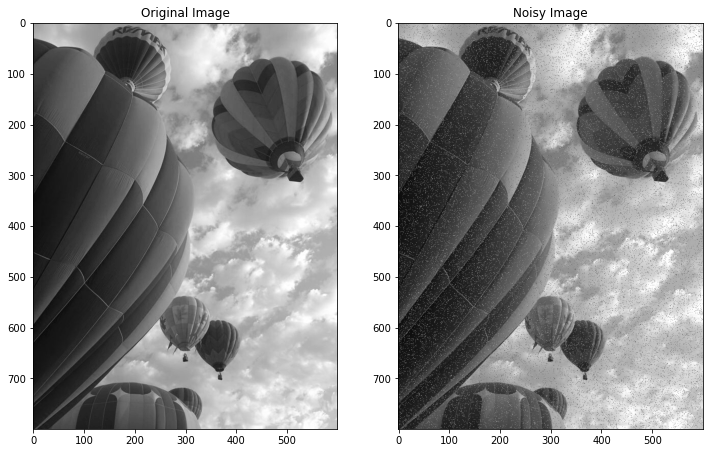

Difference in iterations is  0.0
Final time =  0.2


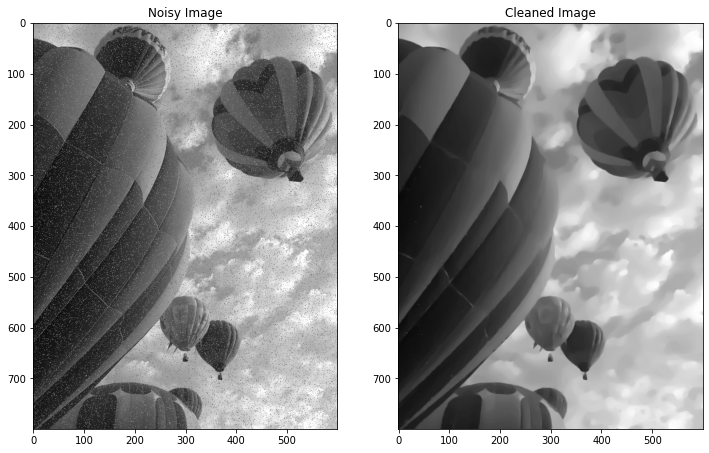

In [75]:
imagename = 'balloons_grey.jpg'
changed_pixels=40000
# Read the image file imagename into an array of numbers, IM
# Multiply by 1. / 255 to change the values so that they are floating point
# numbers ranging from 0 to 1.
IM = imread(imagename, as_gray = True) * (1. / 255)
IM_x, IM_y = IM.shape
IM_og = np.copy(IM)

for lost in range(changed_pixels):
    x_, y_ = random_integers(1, IM_x - 2), random_integers(1, IM_y - 2)
    val = .1*randn() + .5
    IM[x_, y_] = max(min(val, 1.), 0.)

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 12))
ax1.imshow(IM_og, cmap = "gray")
ax2.imshow(IM, cmap = "gray")
ax1.set_title("Original Image")
ax2.set_title("Noisy Image")
plt.show()

# Update variables and parameters for problem 2
lam = 1
time_steps = 200
delta_t, delta_x, delta_y = 1e-3, 1, 1

if delta_t/delta_x**2. > .5:
    print("stability condition fails")

IM0 = np.copy(IM)
IM1 = np.copy(IM)
    
def rhs(u):
    u_x = (np.roll(u, -1, axis = 1) - np.roll(u, 1, axis = 1))/2
    u_y = (np.roll(u, -1, axis = 0) - np.roll(u, 1, axis = 0))/2
    u_xx = np.roll(u, -1, axis = 1) - 2*u + np.roll(u, 1, axis = 1)/delta_x**2
    u_yy = np.roll(u, -1, axis = 0) - 2*u + np.roll(u, 1, axis = 0)/delta_y**2
    u_xy = (np.roll(u_x, -1, axis = 0) - np.roll(u_x, 1, axis = 0))/2
    u = (-lam*(u - IM) + (u_xx*u_y**2 + u_yy*u_x**2 - 2*u_x*u_y*u_xy)/(0.000001 + u_x**2 + u_y**2)**(3/2))*delta_t + u
    return u

iteration = 0
while iteration < time_steps:
    IM1 = rhs(IM1)
    if np.linalg.norm(np.abs((IM0 - IM1))) < 1e-5: break
    IM0 = IM1
    iteration += 1
    
print("Difference in iterations is ", np.linalg.norm(np.abs((IM0 - IM1))))
print("Final time = ", iteration*delta_t)

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 12))
ax1.imshow(IM, cmap = "gray")
ax2.imshow(IM0, cmap = "gray")
ax1.set_title("Noisy Image")
ax2.set_title("Cleaned Image")
plt.show()